In [1]:
import nibabel as nib 
import matplotlib.pyplot as plt 
import numpy as np
import os
from tqdm import tqdm
import seaborn as sns
import pandas as pd

In [2]:
non_harmonized = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/nonharm_ANTS_outputs_exptoinsp_large_images"

files = sorted(os.listdir(non_harmonized))

cases_unharm = []
controls_unharm = []

cases_files_unharm = []

for file in tqdm(files):
    if file.endswith("_control"):
        print("Control:", file)
        control = nib.load(os.path.join(non_harmonized, file, "jacobian_det.nii.gz")).get_fdata()
        controls_unharm.append(control.flatten())
    else:
        #Add only 20 cases and keep a track of the name of the files
        print("Case:",file)
        case = nib.load(os.path.join(non_harmonized, file, "jacobian_det.nii.gz")).get_fdata()
        cases_unharm.append(case.flatten())

  0%|          | 0/30 [00:00<?, ?it/s]

Case: masked_COPDGene_A43240_STANDARD


  3%|▎         | 1/30 [00:07<03:47,  7.84s/it]

Control: masked_COPDGene_A61757_STANDARD_control


  7%|▋         | 2/30 [00:21<04:28,  9.58s/it]

Case: masked_COPDGene_B05639_STANDARD


 10%|█         | 3/30 [00:49<06:48, 15.12s/it]

Case: masked_COPDGene_B14644_STANDARD


 13%|█▎        | 4/30 [01:15<07:55, 18.31s/it]

Control: masked_COPDGene_B15777_STANDARD_control


 17%|█▋        | 5/30 [01:23<06:22, 15.31s/it]

Control: masked_COPDGene_B17236_STANDARD_control


 20%|██        | 6/30 [01:32<05:19, 13.33s/it]

Control: masked_COPDGene_B17317_STANDARD_control


 23%|██▎       | 7/30 [01:59<06:39, 17.39s/it]

Control: masked_COPDGene_B72303_STANDARD_control


 27%|██▋       | 8/30 [02:26<07:31, 20.52s/it]

Case: masked_COPDGene_B86334_STANDARD


 30%|███       | 9/30 [02:52<07:44, 22.10s/it]

Control: masked_COPDGene_C05262_STANDARD_control


 33%|███▎      | 10/30 [03:10<06:57, 20.86s/it]

Control: masked_COPDGene_C19536_STANDARD_control


 37%|███▋      | 11/30 [03:27<06:12, 19.61s/it]

Control: masked_COPDGene_C40785_STANDARD_control


 40%|████      | 12/30 [03:50<06:14, 20.79s/it]

Control: masked_COPDGene_C53764_STANDARD_control


 43%|████▎     | 13/30 [04:18<06:30, 22.96s/it]

Control: masked_COPDGene_C64141_STANDARD_control


 47%|████▋     | 14/30 [04:41<06:04, 22.78s/it]

Control: masked_COPDGene_C64303_STANDARD_control


 50%|█████     | 15/30 [05:03<05:40, 22.69s/it]

Case: masked_COPDGene_C64585_STANDARD


 53%|█████▎    | 16/30 [05:31<05:38, 24.16s/it]

Control: masked_COPDGene_C73437_STANDARD_control


 57%|█████▋    | 17/30 [05:55<05:12, 24.01s/it]

Control: masked_COPDGene_D32260_STANDARD_control


 60%|██████    | 18/30 [06:21<04:57, 24.79s/it]

Case: masked_COPDGene_D36309_STANDARD


 63%|██████▎   | 19/30 [06:40<04:12, 22.98s/it]

Control: masked_COPDGene_D41724_STANDARD_control


 67%|██████▋   | 20/30 [07:06<03:59, 23.95s/it]

Case: masked_COPDGene_D48362_STANDARD


 70%|███████   | 21/30 [07:33<03:42, 24.70s/it]

Case: masked_COPDGene_D70993_STANDARD


 73%|███████▎  | 22/30 [08:00<03:25, 25.63s/it]

Control: masked_COPDGene_D80990_STANDARD_control


 77%|███████▋  | 23/30 [08:24<02:55, 25.01s/it]

Case: masked_COPDGene_D90444_STANDARD


 80%|████████  | 24/30 [08:47<02:26, 24.44s/it]

Case: masked_COPDGene_E59904_STANDARD


 83%|████████▎ | 25/30 [09:17<02:10, 26.08s/it]

Case: masked_COPDGene_E69868_STANDARD


 87%|████████▋ | 26/30 [09:38<01:38, 24.61s/it]

Control: masked_COPDGene_E73754_STANDARD_control


 90%|█████████ | 27/30 [10:03<01:14, 24.76s/it]

Case: masked_COPDGene_F02607_STANDARD


 93%|█████████▎| 28/30 [10:25<00:47, 23.81s/it]

Case: masked_COPDGene_F32094_STANDARD


 97%|█████████▋| 29/30 [10:54<00:25, 25.32s/it]

Control: masked_COPDGene_F56917_STANDARD_control


100%|██████████| 30/30 [11:20<00:00, 25.53s/it]


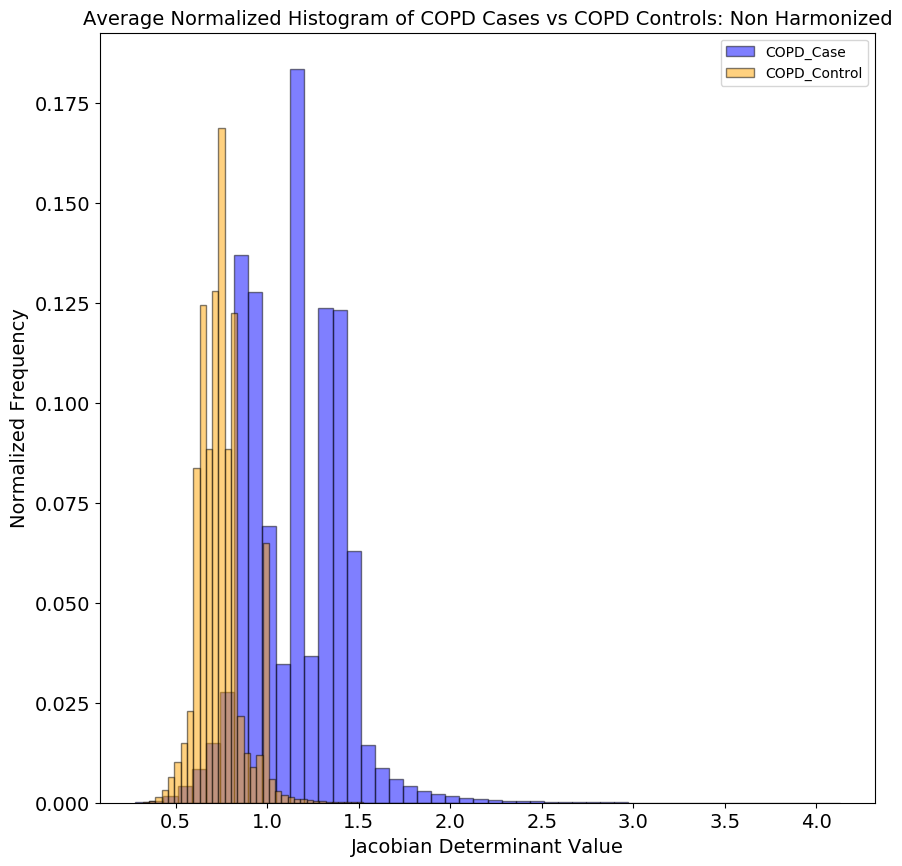

In [4]:
#normalize the histograms 
def normalize_histogram(faltten, num_bins):
    hist, bin_edges = np.histogram(faltten, bins=num_bins)
    normalized_hist = hist/np.sum(hist)
    return normalized_hist, bin_edges

histograms_cases_unharm = []
histograms_controls_unharm = []
num_bins = 50 

for case, control in zip(cases_unharm, controls_unharm):
    normalized_hist_case_unharm, bin_edges_case_unharm = normalize_histogram(case.flatten(), num_bins)
    normalized_hist_control_unharm, bin_edges_control_unharm = normalize_histogram(control.flatten(), num_bins)
    histograms_cases_unharm.append(normalized_hist_case_unharm)
    histograms_controls_unharm.append(normalized_hist_control_unharm)

avg_hist_case_unharm = np.mean(histograms_cases_unharm, axis=0)
avg_hist_control_unharm = np.mean(histograms_controls_unharm, axis=0)

plt.figure(figsize=(10, 10), facecolor='w')
# kde for this normalized histogram
plt.bar(bin_edges_case_unharm[:-1], avg_hist_case_unharm, width=np.diff(bin_edges_case_unharm), color='blue', edgecolor='black', label='COPD_Case', alpha = 0.5)
plt.bar(bin_edges_control_unharm[:-1], avg_hist_control_unharm, width=np.diff(bin_edges_control_unharm), color='orange', edgecolor='black', label='COPD_Control', alpha = 0.5)
plt.xlabel('Jacobian Determinant Value', fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('Normalized Frequency', fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Average Normalized Histogram of COPD Cases vs COPD Controls: Non Harmonized', fontsize = 14)
plt.legend()
# plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/quantitative/nonharmonized_jd.tiff", dpi = 300)
plt.show()

In [1]:
non_harmonized = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/harm_ANTS_outputs_exptoinsp_large_images"

files = sorted(os.listdir(non_harmonized))

cases = []
controls = []

for file in tqdm(files):
    if file.endswith("_control"):
        control = nib.load(os.path.join(non_harmonized, file, "jacobian_det.nii.gz")).get_fdata()
        controls.append(control.flatten())
    else:
        case = nib.load(os.path.join(non_harmonized, file, "jacobian_det.nii.gz")).get_fdata()
        cases.append(case.flatten())

NameError: name 'os' is not defined

In [ ]:
#normalize the histograms 
def normalize_histogram(faltten, num_bins):
    hist, bin_edges = np.histogram(faltten, bins=num_bins)
    normalized_hist = hist/np.sum(hist)
    return normalized_hist, bin_edges

num_bins = 50
histograms_cases = []
histograms_controls = []

for case, control in zip(cases, controls):
    normalized_hist_case, bin_edges_case = normalize_histogram(case.flatten(), num_bins)
    normalized_hist_control, bin_edges_control = normalize_histogram(control.flatten(), num_bins)
    histograms_cases.append(normalized_hist_case)
    histograms_controls.append(normalized_hist_control)

avg_hist_case = np.mean(histograms_cases, axis=0)
avg_hist_control = np.mean(histograms_controls, axis=0)

plt.figure(figsize=(10, 10))
#
plt.bar(bin_edges_case[:-1], avg_hist_case, width=np.diff(bin_edges_case), color='blue', edgecolor='black', label='COPD_Case', alpha = 0.5)
plt.bar(bin_edges_control[:-1], avg_hist_control, width=np.diff(bin_edges_control), color='orange', edgecolor='black', label='COPD_Control', alpha = 0.5)
plt.xlabel('Log Jacobian Determinant Value', fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlim(-1.0, 1.0)
plt.ylabel('Normalized Frequency', fontsize = 16)
plt.yticks(fontsize = 14)
plt.title('Average Normalized Histogram of COPD Cases vs COPD Controls: Harmonized', fontsize = 16)
plt.legend()
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/quantitative/harmonized_jd.tiff", dpi = 300)
plt.show()